In [1]:
# importar pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pylab import rcParams
#from plotly import tools
#import plotly.plotly as py
#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

In [2]:
# definir parâmetros extras
import warnings
warnings.filterwarnings("ignore")
sns.set(style="white", color_codes=True)

In [3]:
# carregar arquivo de dados de treino
data = pd.read_csv('weather-train.csv', index_col='datetime', parse_dates=['datetime'])

# mostrar alguns exemplos de registros
data.head()

,temperature
datetime,
2012-10-01 12:00:00,NaN
2012-10-01 13:00:00,10.8800
2012-10-01 14:00:00,10.9198
2012-10-01 15:00:00,11.0240
2012-10-01 16:00:00,11.1281


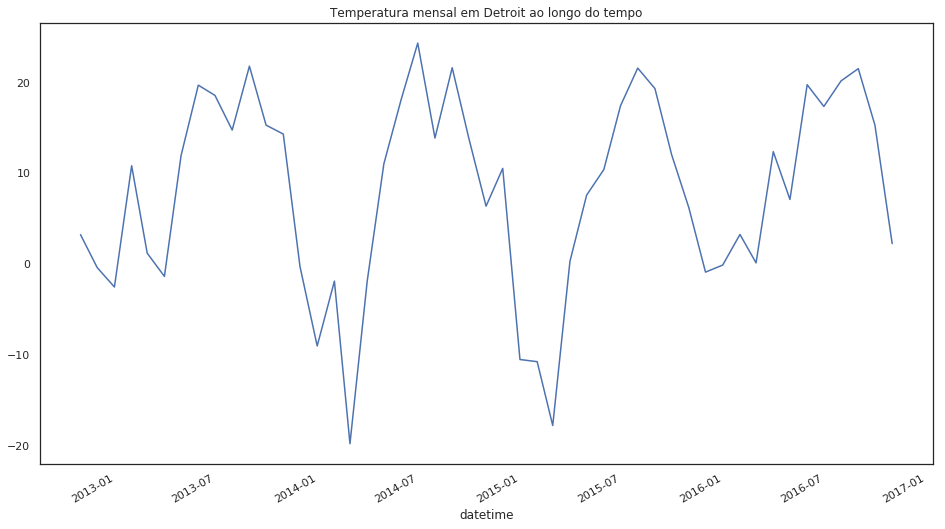

In [6]:
# asfreq method is used to convert a time series to a specified frequency. Here it is monthly frequency.
plt.figure(figsize=(16, 9))
plt.title('Temperatura mensal em Detroit ao longo do tempo')
data['temperature'].asfreq('M').plot()
plt.show()

In [7]:
data.fillna(method='ffill', inplace=True)

In [11]:
# We downsample from hourly to 3 day frequency aggregated using mean
data.resample('D').mean().head(5)

,temperature
datetime,
2012-10-01,11.342345
2012-10-02,14.434225
2012-10-03,15.529583
2012-10-04,17.002083
2012-10-05,18.251042


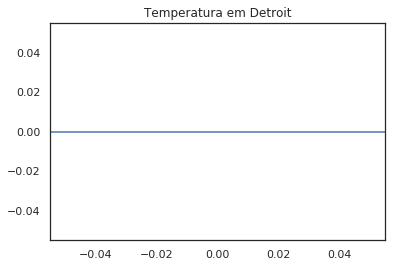

In [20]:
# Autocorrelation of humidity of San Diego
plot_acf(data['temperature'], lags=25, title="Temperatura em Detroit")
plt.show()

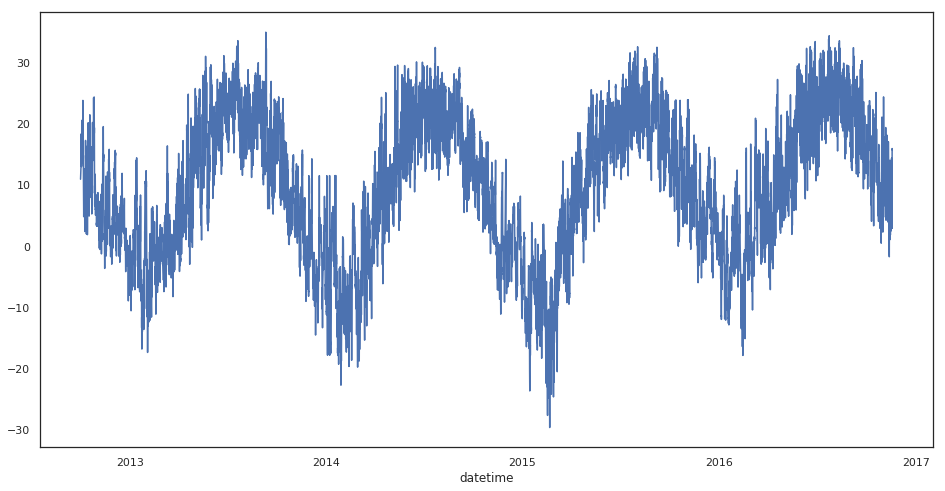

In [21]:
data['temperature'].plot(figsize=(16,8))

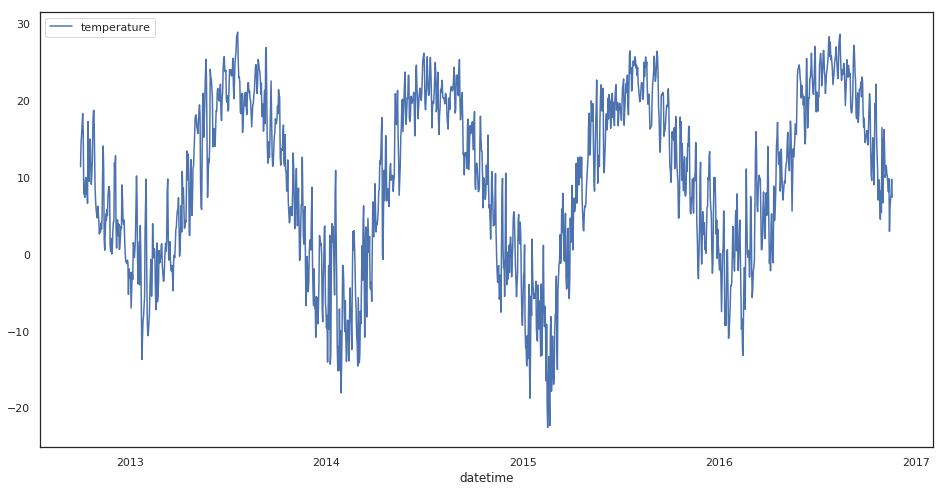

In [22]:
data.resample('D').mean().plot(figsize=(16,8))

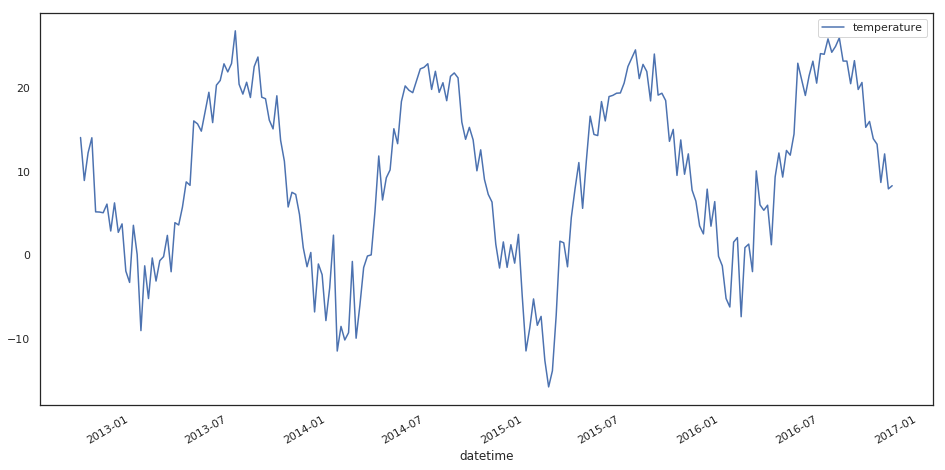

In [23]:
data.resample('7D').mean().plot(figsize=(16,8))

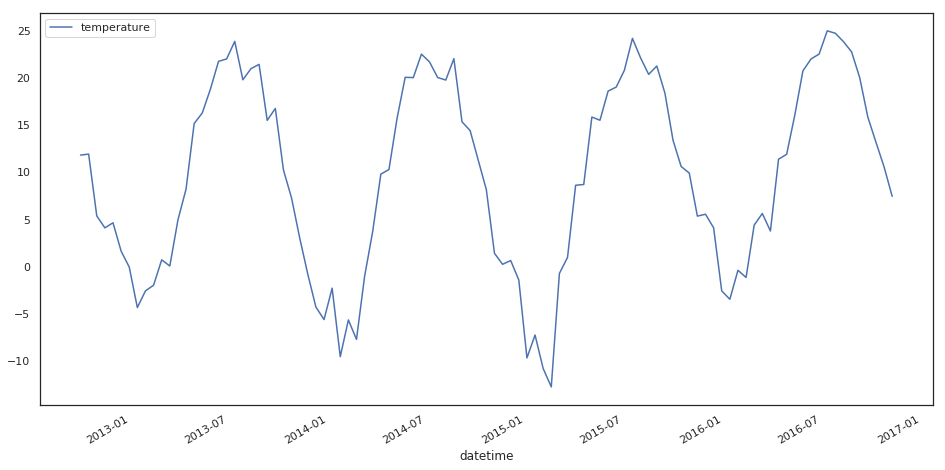

In [24]:
data.resample('15D').mean().plot(figsize=(16,8))

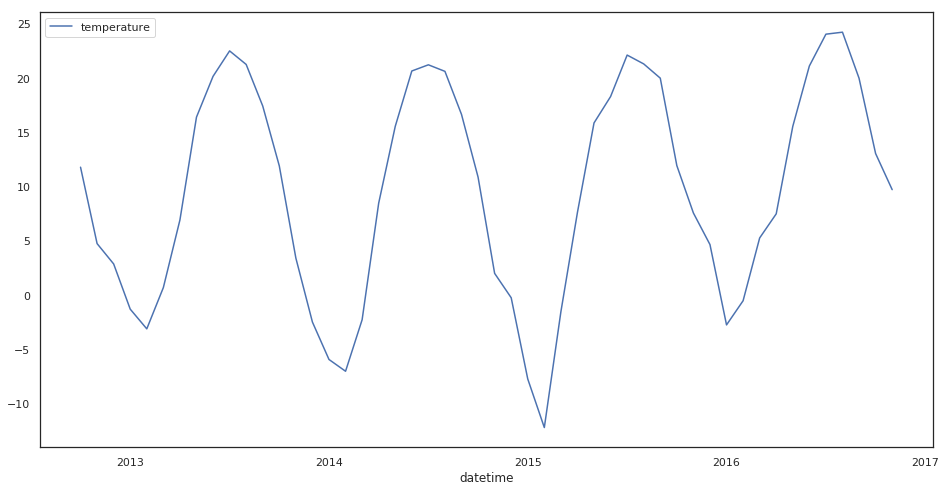

In [25]:
data.resample('M').mean().plot(figsize=(16,8))

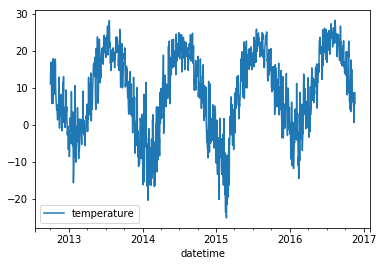

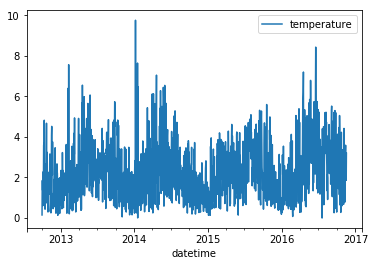

In [5]:
idxs = (data.index.hour >= 9) & (data.index.hour <= 17)
medias = data[idxs].resample('D').mean()
desvios = data[idxs].resample('D').std()
medias.plot() #figsize=(16,8))
desvios.plot()
plt.show()